<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/time_series/time_series_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Things to take care of**
1. GMT issues with time -
2. Daylight saving hours
3. US countries measure the temperature in degree F not in degree celcius.
4. Time series classification - XGboost - Random forest - SVM - NN
5. Time series regression
| Concept            | Definition                                       | Output Type      | Example |
|--------------------|---------------------------------------------------|------------------|---------|
| Time Series Prediction | Any model predicting future values or classes | Numeric or class | Predict stock will rise/fall |
| Time Series Forecasting | Predicting **numeric** future values using trends, seasonality, patterns | Numeric only | Forecast sales for next 6 months |

6. Time series decomposition: decompose data by using  seasons, trends, residual (Error - Trend - Season)

7. Spectral Analysis Analysis that gives us a kind of tehnique to identify cyclic patterns in data

8. Types of data in time-series
   1. **Time series data**
   2. **Cross_sectional data:** data of sales in may and data of sales in august
   3.  You can extract cross_sectional data from time series data and you can build different hypothesis
   4. **Pooled data :** timeseries data  + cross sectional data

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

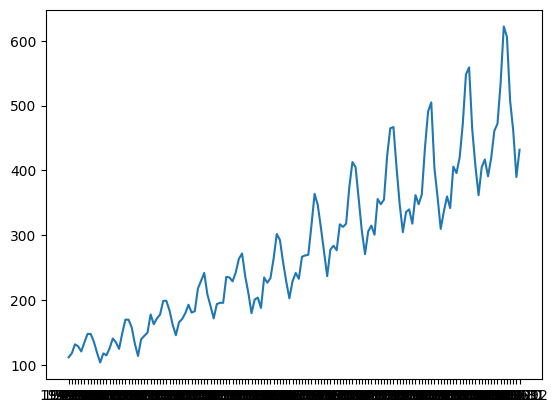

In [7]:
plt.plot(df["Month"],df["Passengers"])
plt.show()

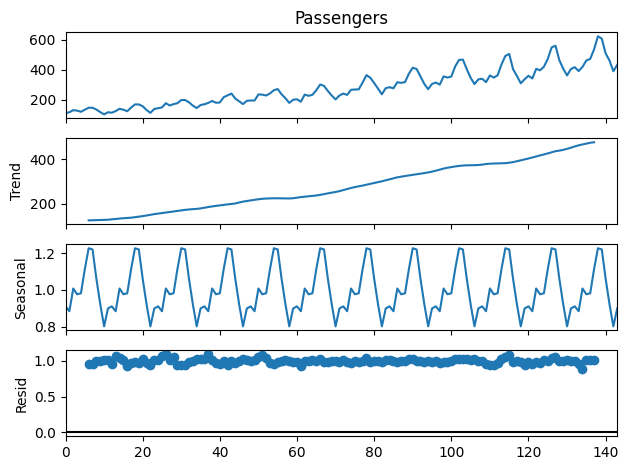

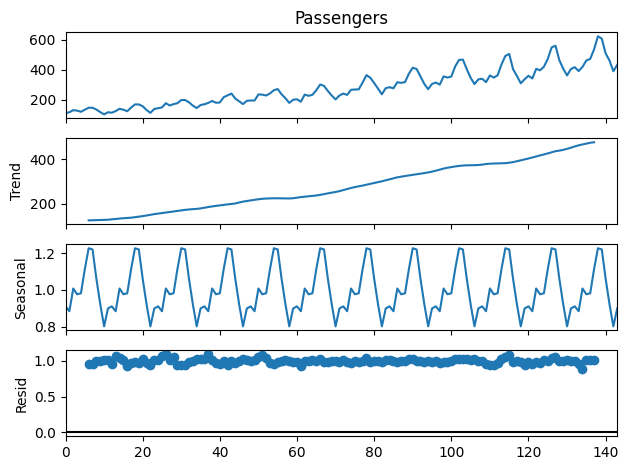

In [8]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df["Passengers"], model="multiplicative", period=12)
decompose.plot()

<Axes: >

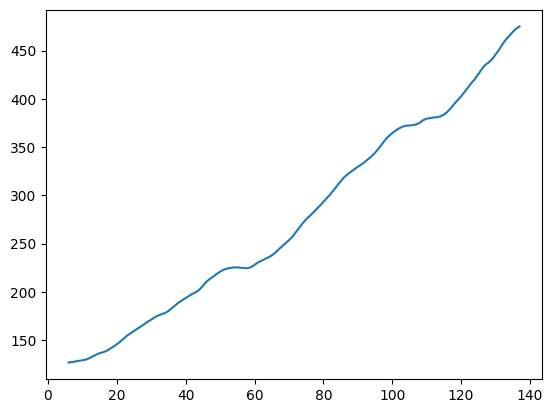

In [10]:
decompose.trend.plot()

<Axes: >

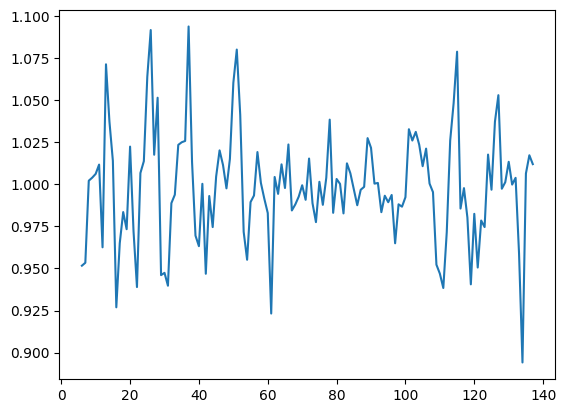

In [11]:
decompose.resid.plot()

<Axes: >

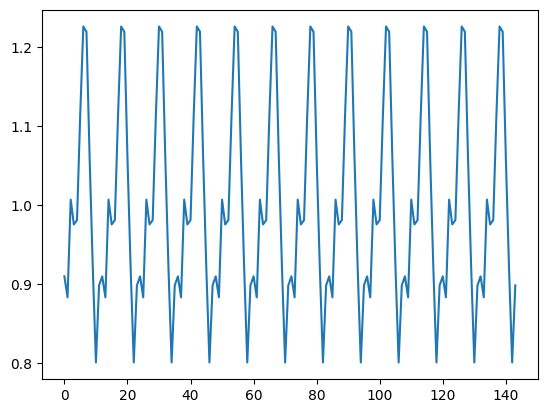

In [12]:
decompose.seasonal.plot()

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Data Loading and Preparation
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True, drop=True)

for i in range(1, 13):
    df[f'lag_{i}'] = df['Passengers'].shift(i)
df.dropna(inplace=True)

# 2. Split Data
X = df.drop('Passengers', axis=1)
y = df['Passengers']

split_point = -12 # Use the last 12 months for testing
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# 3. Train and Tune XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Grid search completed. Best parameters found:")
print(grid_search.best_params_)

# 4. Evaluate and Plot
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



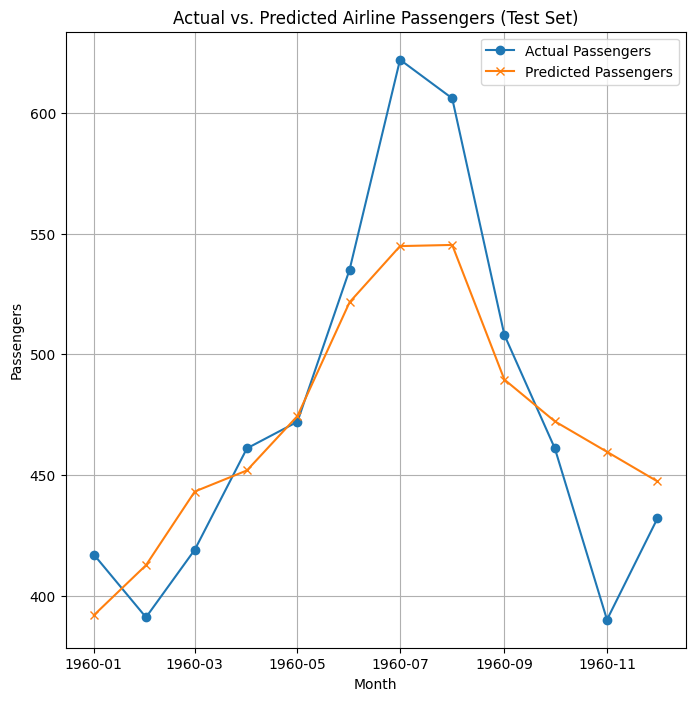

In [22]:
plt.figure(figsize=(8, 8))
plt.plot(y_test.index, y_test, label='Actual Passengers', marker='o')
plt.plot(y_test.index, predictions, label='Predicted Passengers', marker='x')
plt.title('Actual vs. Predicted Airline Passengers (Test Set)')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()